In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_csv("D:\Dhanush\DSML\Case Studies\LoanTap\logistic_regression.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Dhanu\AppData\Local\Temp\ipykernel_54048\3350820787.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Dhanush\DSML\Case Studies\LoanTap\logistic_regression.csv")


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## Problem Statement:

### Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.shape

(396030, 27)

## Data dictionary:

* loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate : Interest Rate on the loan
* installment : The monthly payment owed by the borrower if the loan originates.
* grade : LoanTap assigned loan grade
* sub_grade : LoanTap assigned loan subgrade
* emp_title :The job title supplied by the Borrower when applying for the loan.
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.
* verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* issue_d : The month which the loan was funded
* loan_status : Current status of the loan - Target Variable
* purpose : A category provided by the borrower for the loan request.
* title : The loan title provided by the borrower
* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line :The month the borrower's earliest reported credit line was opened
* open_acc : The number of open credit lines in the borrower's credit file.
* pub_rec : Number of derogatory public records
* revol_bal : Total credit revolving balance
* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc : The total number of credit lines currently in the borrower's credit file
* initial_list_status : The initial listing status of the loan. Possible values are – W, F
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc : Number of mortgage accounts.
* pub_rec_bankruptcies : Number of public record bankruptcies
* Address: Address of the individual

In [8]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [9]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [10]:
df.describe(include = 'object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [11]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [12]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

* Since mort_acc has more than 9.5% of values null, convert the null values to mean aggregate of the column values, as droping this much amount of rows is not feasible.
* emp_lenght has more than 4.62% of values null, convert the null values to 'unknown' so that we will not loose the rows.
* emp_title has more than 5.78% of values null, convert the null values to 'unknown' so that we will not loose the rows.

In [13]:
#Filling missing values with 'Unknown' for object dtype
fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
df.fillna(value=fill_values, inplace=True)

In [14]:
mort_acc_mean = int(round(df['mort_acc'].mean())) 
df['mort_acc'].fillna(mort_acc_mean, inplace=True)

In [15]:

emp_length_mapping = {
    '10+ years': 10,
    '< 1 year': 0,
    '4 years': 4,
    '6 years': 6,
    '9 years': 9,
    '2 years': 2,
    '3 years': 3,
    '8 years': 8,
    '7 years': 7,
    '5 years': 5,
    '1 year': 1
}

# Replacing the values in emp_length using the mapping dictionary
df['emp_length'] = df['emp_length'].replace(emp_length_mapping)


In [16]:
emp_length_mean = int(round(df['emp_length'].mean())) 
df['emp_length'].fillna(emp_length_mean, inplace=True)

In [17]:
df.dropna(inplace=True)

In [18]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

* All the null values have been removed.

#### Duplicate Detection:

In [19]:
df.duplicated().value_counts()

False    395219
Name: count, dtype: int64

- There are NO Duplicate entries in the dataset.

### Convert earliest credit line & issue date to datetime

In [20]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_d'] = pd.to_datetime(df['issue_d'])

C:\Users\Dhanu\AppData\Local\Temp\ipykernel_54048\3839075073.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
C:\Users\Dhanu\AppData\Local\Temp\ipykernel_54048\3839075073.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])


### Irrelavent columns to remove:
* emp_title
* address

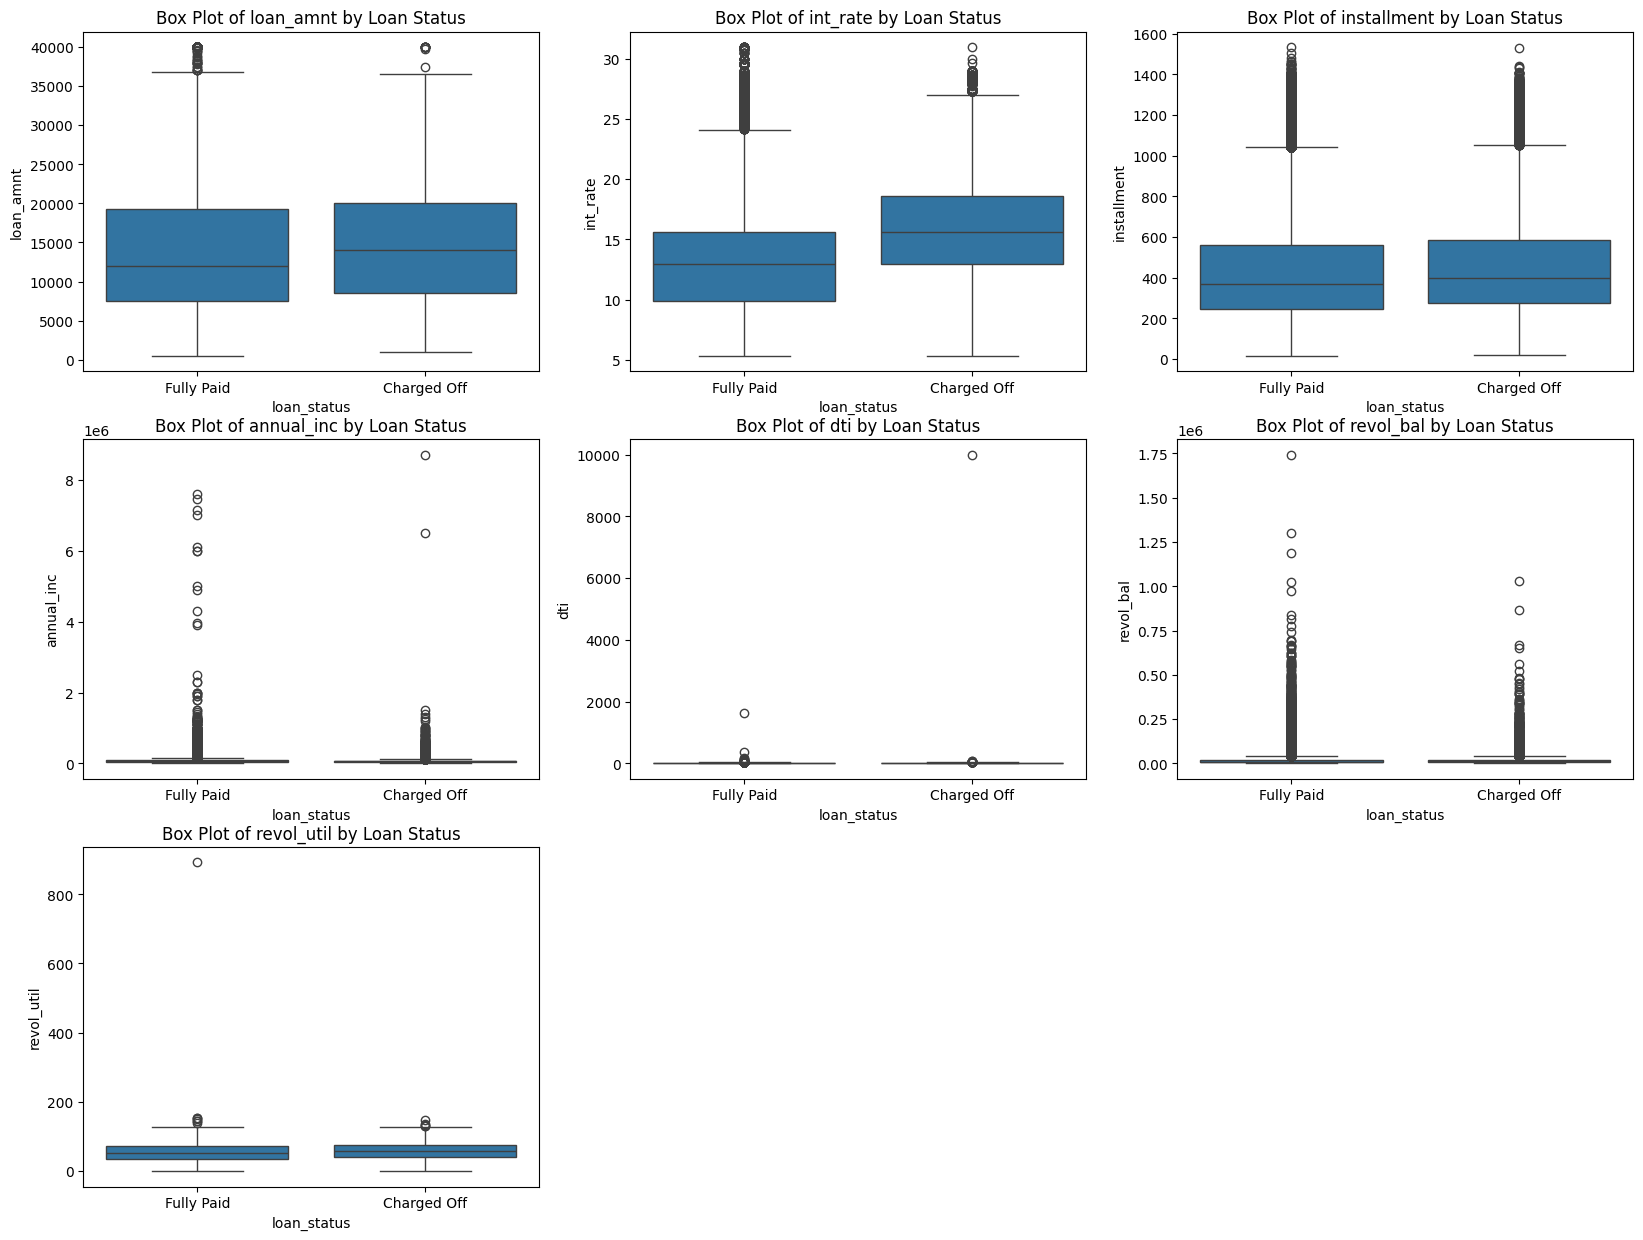

In [21]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

#numerical columns
num_col = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util']


plt.figure(figsize=(20, 15))

# Plot box plots
for i, col in enumerate(num_col, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='loan_status', y=col)
    plt.title(f'Box Plot of {col} by Loan Status')

plt.show()


1. Loan Amount (loan_amnt):

* The distribution of loan amounts is similar for both fully paid and charged-off loans.
* Median loan amounts for both categories are almost the same.
* There are some outliers in both fully paid and charged-off categories, but these outliers do not differ significantly between the two loan statuses.
2. Interest Rate (int_rate):

* Charged-off loans tend to have a higher interest rate compared to fully paid loans.
* The median interest rate for charged-off loans is higher than that for fully paid loans.
* This suggests that higher interest rates might be associated with a higher risk of loans being charged off.
3. Installment:

* The distribution of installments is similar for both fully paid and charged-off loans.
* Median installments for both categories are almost the same.
* Outliers are present in both categories, but they do not show significant differences between the two loan statuses.
4. Annual Income (annual_inc):

* Both fully paid and charged-off loans have similar distributions of annual income.
* There are many outliers with very high incomes in both categories.
* The presence of outliers indicates that a small number of borrowers have exceptionally high incomes, but these do not significantly differentiate between the loan statuses.
5. Debt-to-Income Ratio (dti):

* The distribution of the debt-to-income ratio is similar for both fully paid and charged-off loans.
* There are some extreme outliers with very high DTI values in both categories.
* Median DTI values for both categories are similar, indicating that DTI may not be a strong differentiator between the loan statuses in this dataset.
6. Revolving Balance (revol_bal):

* The distribution of revolving balance is similar for both fully paid and charged-off loans.
* Both categories have a significant number of outliers with very high revolving balances.
* Median revolving balances for both categories are similar.
7. Revolving Utilization Rate (revol_util):

* The distribution of the revolving utilization rate is similar for both fully paid and charged-off loans.
* There are some extreme outliers with very high utilization rates in both categories.
* Median revolving utilization rates for both categories are similar.

### Summary
* Interest Rate: Higher interest rates are associated with a higher likelihood of loans being charged off. This suggests that interest rate could be an important predictor of loan status.
* Loan Amount, Installment, Annual Income, Debt-to-Income Ratio, Revolving Balance, and Revolving Utilization Rate: These features show similar distributions for both fully paid and charged-off loans. They do not show strong differentiation between the two loan statuses based on the box plots.

In [22]:
#Removing outliers using standard deviation
for col in num_col:
  mean=df[col].mean()
  std=df[col].std()
  upper = mean + (3*std)
  df = df[~(df[col]>upper)]

In [23]:
df.shape

(381265, 27)

In [24]:
df['loan_status'].value_counts()

loan_status
Fully Paid     306298
Charged Off     74967
Name: count, dtype: int64

In [25]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    188262
RENT        156721
OWN          36144
OTHER          107
NONE            29
ANY              2
Name: count, dtype: int64

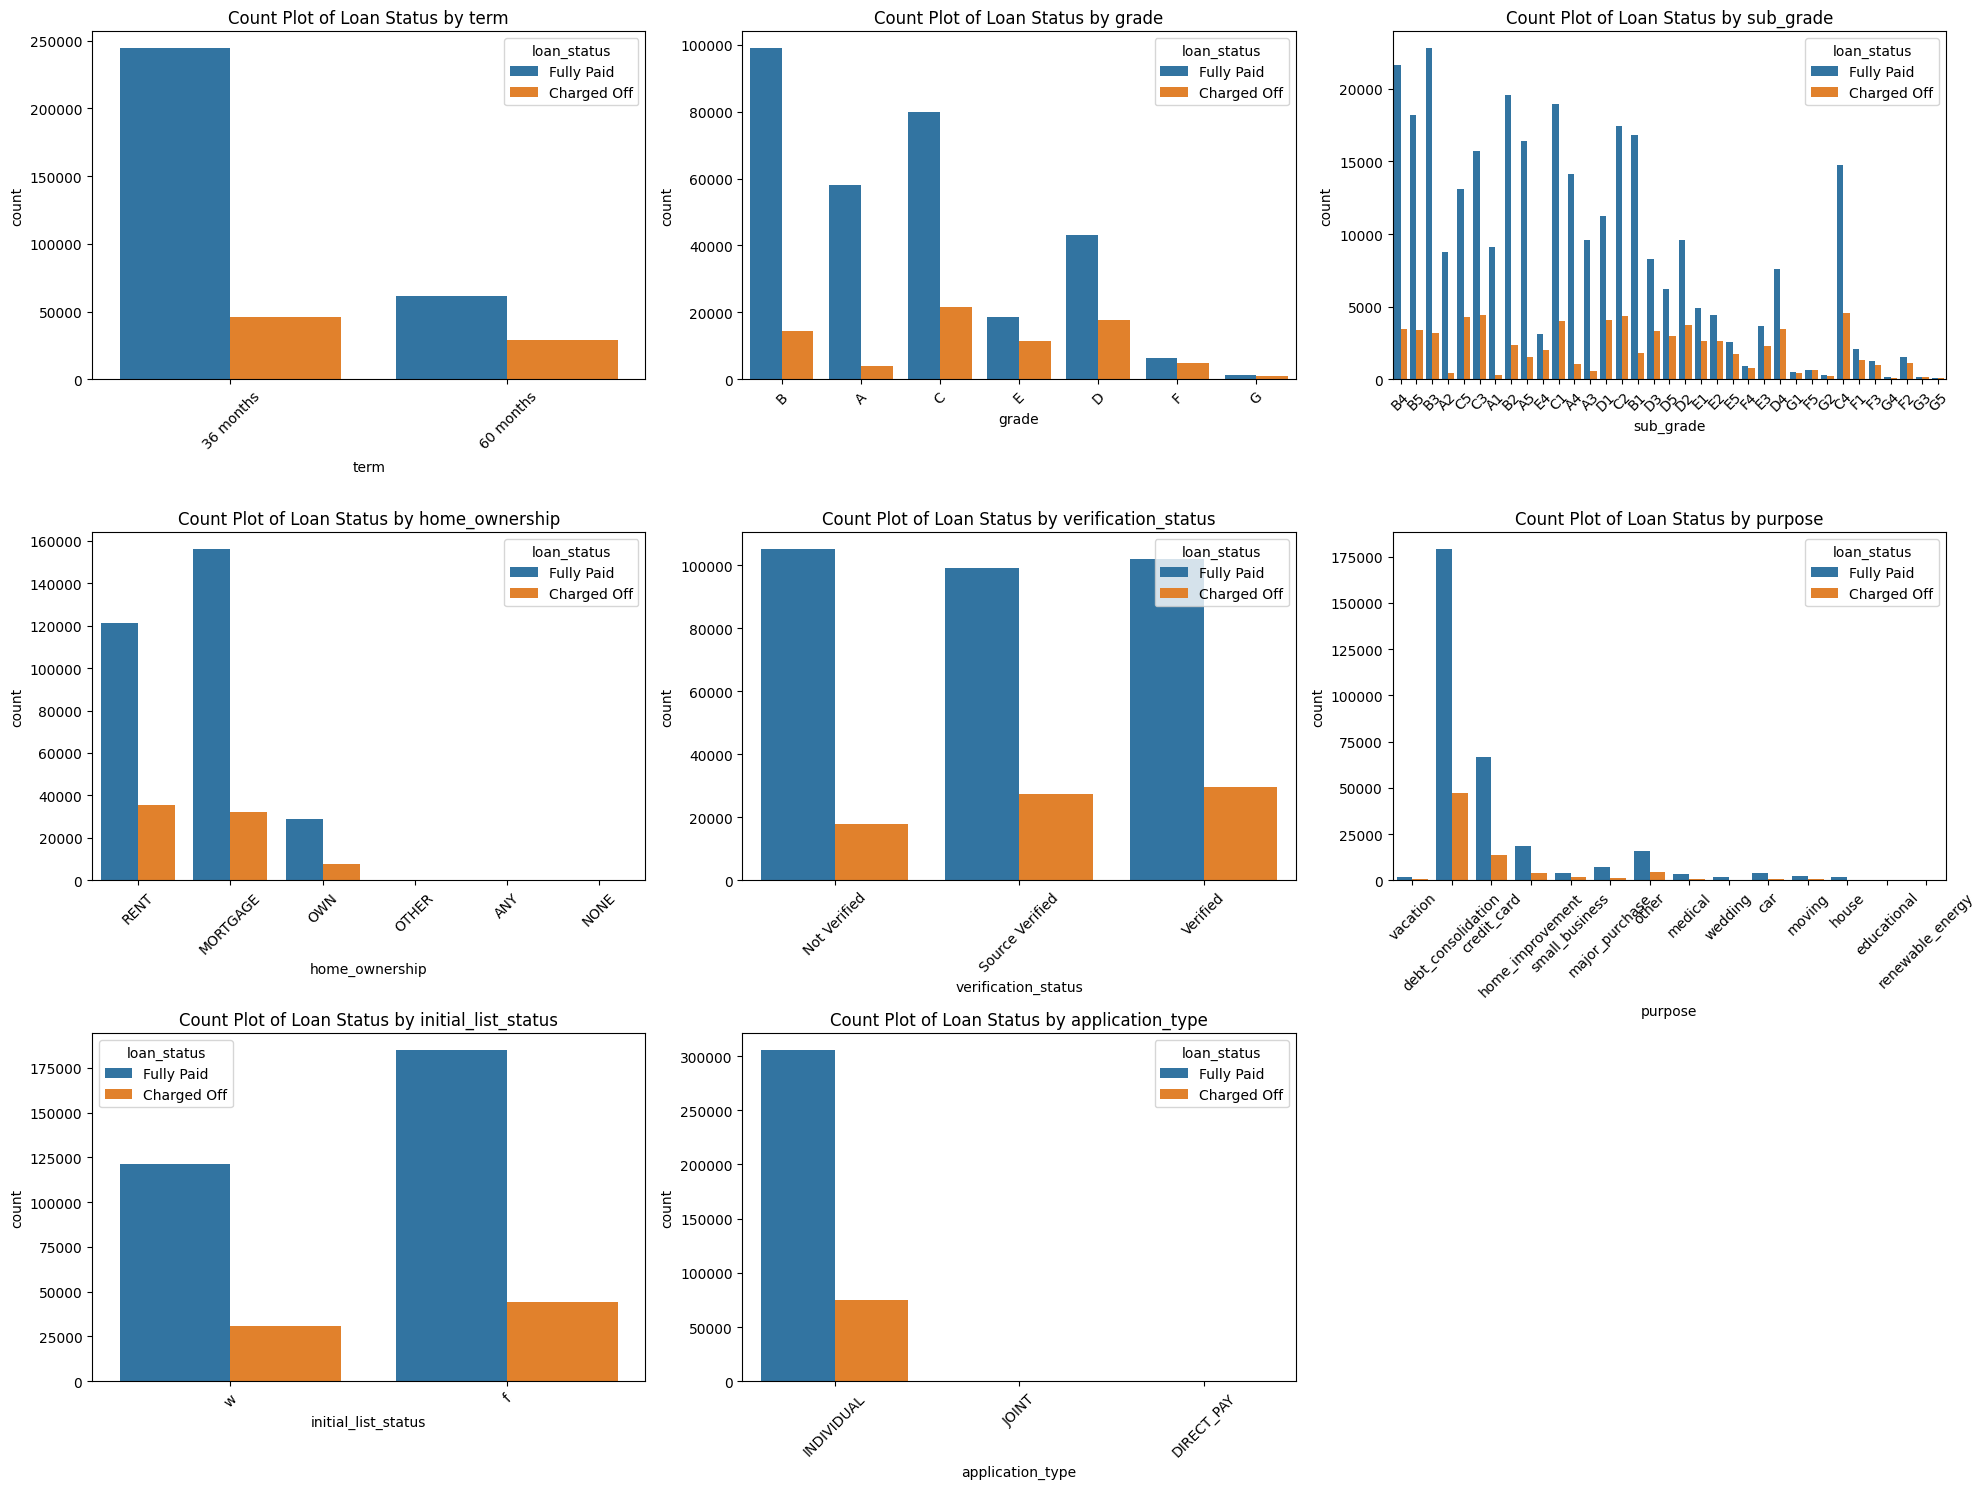

In [26]:
plt.figure(figsize=(20, 15))

categorical_columns = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='loan_status')
    plt.title(f'Count Plot of Loan Status by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


1. Term:

* Loans with a term of 36 months are more common and have a higher number of fully paid loans compared to loans with a term of 60 months.
* The proportion of charged-off loans is higher for 60-month term loans compared to 36-month term loans.
2. Grade:

* Grades B, A, and C are the most common loan grades, with Grade B having the highest number of loans.
* The proportion of charged-off loans increases as the loan grade decreases from A to G. Lower grades (e.g., E, F, G) have a higher proportion of charged-off loans.
3. Sub-Grade:

* Sub-grades show more granular distribution within each grade. Sub-grades such as B3, C1, A4, and B5 have a higher number of fully paid loans.
* There is a noticeable increase in charged-off loans in lower sub-grades within each grade.
4. Home Ownership:

* Most borrowers are either renting or have a mortgage. Renters form the largest group, followed by those with a mortgage.
* Borrowers with a mortgage have a higher number of fully paid loans compared to renters.
* The proportion of charged-off loans is relatively lower for borrowers with a mortgage compared to renters.
5. Verification Status:

* Loans where income was verified or not verified have similar distributions.
* The proportion of charged-off loans is slightly higher for loans where the income was not verified.
6. Purpose:

* Debt consolidation is the most common purpose for taking a loan, followed by credit card and home improvement.
* The proportion of charged-off loans is relatively higher for purposes such as small business, renewable energy, and educational loans.
* Loans for major purposes like debt consolidation and credit card have a significant number of fully paid loans but also show a considerable number of charged-off loans.
7. Initial List Status:

* Loans initially listed as 'W' have a higher number of fully paid loans compared to those listed as 'F'.
* The proportion of charged-off loans is higher for loans initially listed as 'F'.
8. Application Type:

* The majority of the loans are individual applications, with very few being joint applications.
* Individual applications have a higher number of both fully paid and charged-off loans.
* Joint applications show a lower proportion of charged-off loans compared to individual applications.

In [27]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,0.0,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6.0,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [29]:
df['pub_rec'].value_counts()

pub_rec
0.0     324676
1.0      48847
2.0       5314
3.0       1471
4.0        501
5.0        221
6.0        114
7.0         48
8.0         31
10.0        11
9.0         10
11.0         6
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64

In [30]:
df['mort_acc'].value_counts()

mort_acc
0.0     137682
2.0      84083
1.0      58593
3.0      35917
4.0      26199
5.0      16922
6.0      10228
7.0       5560
8.0       2821
9.0       1487
10.0       776
11.0       420
12.0       223
13.0       117
14.0        84
15.0        44
16.0        27
17.0        15
19.0        12
24.0        10
20.0        10
18.0        10
22.0         6
25.0         4
21.0         3
23.0         2
26.0         2
27.0         2
31.0         2
32.0         2
30.0         1
34.0         1
Name: count, dtype: int64

In [31]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    336703
1.0     42275
2.0      1817
3.0       347
4.0        80
5.0        31
6.0         6
7.0         4
8.0         2
Name: count, dtype: int64

### Simple Feature Engineering steps:
E.g.: Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:

1. Pub_rec
2. Mort_acc
3. Pub_rec_bankruptcies

In [32]:
df['pub_rec'] = df['pub_rec'].apply(lambda x : 1 if x >=1 else 0)

In [33]:
df['mort_acc'] = df['mort_acc'].apply(lambda x : 1 if x >=1 else 0)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x : 1 if x >=1 else 0)

In [34]:
print(df['pub_rec'].value_counts())
print(df['mort_acc'].value_counts())
print(df['pub_rec_bankruptcies'].value_counts())

pub_rec
0    324676
1     56589
Name: count, dtype: int64
mort_acc
1    243583
0    137682
Name: count, dtype: int64
pub_rec_bankruptcies
0    336703
1     44562
Name: count, dtype: int64


In [35]:
df.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,381265.000000,381265.000000,381265.000000,381265.000000,381265.000000,381265,381265.000000,381265,381265.000000,381265.000000,381265.000000,381265.000000,381265.000000,381265.000000,381265.000000
mean,13668.497239,13.593656,416.317218,5.925304,69956.353118,2014-01-31 21:14:26.147168,17.379460,1998-06-20 01:07:58.826013312,11.233528,0.148424,13913.578918,53.584219,25.216451,0.638881,0.116879
min,500.000000,5.320000,16.080000,0.000000,4000.000000,2007-08-01 00:00:00,0.000000,1944-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,7675.000000,10.380000,247.110000,3.000000,45000.000000,2013-05-01 00:00:00,11.340000,1994-12-01 00:00:00,8.000000,0.000000,5921.000000,35.700000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,368.220000,6.000000,62000.000000,2014-04-01 00:00:00,16.930000,1999-11-01 00:00:00,10.000000,0.000000,10886.000000,54.500000,24.000000,1.000000,0.000000
75%,18875.000000,16.320000,548.850000,10.000000,85179.000000,2015-03-01 00:00:00,23.000000,2003-05-01 00:00:00,14.000000,0.000000,18752.000000,72.500000,32.000000,1.000000,0.000000
max,38475.000000,26.990000,1181.150000,10.000000,252361.000000,2016-12-01 00:00:00,71.400000,2013-10-01 00:00:00,76.000000,1.000000,68204.000000,123.300000,150.000000,1.000000,1.000000
std,7934.343240,4.424539,230.663896,3.556511,35823.111958,NaN,8.102673,NaN,5.082395,0.355521,11171.475088,24.330277,11.805452,0.480326,0.321277


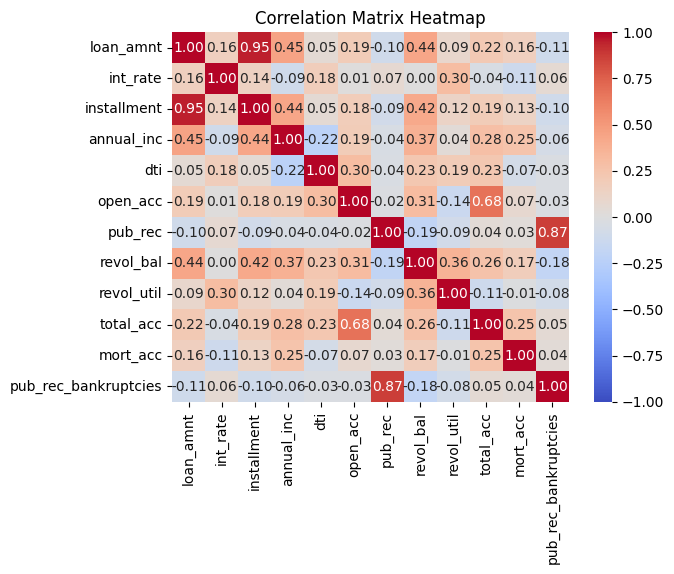

Highly correlated features to be removed: {'pub_rec_bankruptcies', 'installment'}
Shape of the reduced dataframe: (381265, 25)


In [36]:
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

df_corr = df[['loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']]
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

high_corr_var = set()
threshold = 0.8

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_var.add(colname)

print(f"Highly correlated features to be removed: {high_corr_var}")

df_reduced = df.drop(columns=high_corr_var)
print(f"Shape of the reduced dataframe: {df_reduced.shape}")

New DF == df_reduced

In [37]:
df = df_reduced.drop(['address','emp_title','title','issue_d','earliest_cr_line'], axis =1 )

In [38]:
df['loan_status'].value_counts()

loan_status
1    306298
0     74967
Name: count, dtype: int64

In [39]:
# Non-numeric columns
cat_cols = df_reduced.select_dtypes(include='object').columns
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'purpose', 'title', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [40]:
# Number of unique values in all non-numeric columns
for col in cat_cols:
  print(f"No. of unique values in {col}: {df_reduced[col].nunique()}")

No. of unique values in term: 2
No. of unique values in grade: 7
No. of unique values in sub_grade: 35
No. of unique values in emp_title: 168083
No. of unique values in home_ownership: 6
No. of unique values in verification_status: 3
No. of unique values in purpose: 14
No. of unique values in title: 47357
No. of unique values in initial_list_status: 2
No. of unique values in application_type: 3
No. of unique values in address: 379088


In [41]:
df['term']=df['term'].map({' 36 months': 36, ' 60 months':60}).astype(int)

## Data Pre-Processing

In [42]:
from sklearn.model_selection import train_test_split # type: ignore
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381265 entries, 0 to 396029
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            381265 non-null  float64
 1   term                 381265 non-null  int32  
 2   int_rate             381265 non-null  float64
 3   grade                381265 non-null  object 
 4   sub_grade            381265 non-null  object 
 5   emp_length           381265 non-null  float64
 6   home_ownership       381265 non-null  object 
 7   annual_inc           381265 non-null  float64
 8   verification_status  381265 non-null  object 
 9   purpose              381265 non-null  object 
 10  dti                  381265 non-null  float64
 11  open_acc             381265 non-null  float64
 12  pub_rec              381265 non-null  int64  
 13  revol_bal            381265 non-null  float64
 14  revol_util           381265 non-null  float64
 15  total_acc            3

In [44]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler # type: ignore

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
# One-hot encode categorical variables
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = pd.DataFrame(ohe.fit_transform(X_train[categorical_features]), columns=ohe.get_feature_names_out(categorical_features))
X_test_encoded = pd.DataFrame(ohe.transform(X_test[categorical_features]), columns=ohe.get_feature_names_out(categorical_features))

# Drop original categorical columns from training and testing sets
X_train = X_train.drop(columns=categorical_features)
X_test = X_test.drop(columns=categorical_features)

# Concatenate the encoded categorical columns back to the training and testing sets
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Scale numerical variables
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Verify the shapes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

c:\Users\Dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Shape of X_train: (266885, 82)
Shape of X_test: (114380, 82)


In [45]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [46]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (266885, 82)
Shape of X_test: (114380, 82)


In [47]:
X_train.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
0,-0.338503,-0.558307,-0.134835,-1.101661,-1.252469,1.480658,-0.833041,-0.416406,-0.170182,0.809116,-0.526948,0.750228,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.612568,-0.558307,0.240727,-0.257892,-0.277238,1.959702,1.332133,-0.416406,1.505256,0.702254,0.574120,-1.332928,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.461360,-0.558307,-1.288671,1.148391,-0.221510,0.604056,0.544797,-0.416406,-0.368828,0.167946,0.574120,0.750228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.227136,-0.558307,-1.060166,1.148391,0.697993,-1.251622,-0.439373,-0.416406,0.339753,0.352899,-0.442250,0.750228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.551604,-0.558307,0.168329,-0.820405,1.617497,1.916489,0.741631,-0.416406,-0.407002,-0.403353,0.828212,0.750228,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Using SMOTE to balance the target variable 

In [48]:
pip install imbalanced-learn # type: ignore


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [49]:
from imblearn.over_sampling import SMOTE # type: ignore

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


c:\Users\Dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Dhanu\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dhanu\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

In [50]:
print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}, , count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_resampled == 1)}, , count of label 0: {sum(y_train_resampled == 0)}")

Before OverSampling, count of label 1: 214623, , count of label 0: 52262
After OverSampling, count of label 1: 214623, , count of label 0: 214623


# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
print("train_preds",train_preds)
print("test_preds",test_preds)

train_preds [1 0 1 ... 1 1 1]
test_preds [0 0 0 ... 1 1 1]


c:\Users\Dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# Get feature importances (coefficients)
coefficients = model.coef_[0]
print(coefficients)

[-1.27120269e-01 -1.69221424e-01  3.99795312e-01 -5.35491019e-03
  2.25087034e-01 -1.93433284e-01 -1.52702756e-01 -1.59316863e-02
  8.62941923e-02 -1.01502825e-01  1.41086084e-01  4.06935744e-02
  1.83639917e+00  9.68118377e-01  3.03576538e-01 -1.77319416e-01
 -5.80848774e-01 -1.01505356e+00 -1.09074170e+00  1.11354056e+00
  5.22957821e-01  3.40365753e-01  5.27952605e-02 -1.93260229e-01
  6.01611754e-01  3.85667611e-01  1.71724490e-01 -3.65682000e-02
 -1.54317277e-01  3.73700084e-01  1.76250832e-01  9.45970578e-03
 -9.79936340e-02 -1.57840449e-01  1.43701029e-01  2.87813261e-02
  8.55478654e-03 -1.58857386e-01 -1.99499171e-01  4.93072793e-02
 -5.18472308e-02 -1.12649316e-01 -1.70725491e-01 -2.94934015e-01
  1.11119932e-01 -1.05566552e-01 -1.93438946e-01 -3.18696485e-01
 -5.08471509e-01 -3.06563968e-01 -1.16936202e-01 -4.26131761e-01
 -3.54696038e-02 -2.05640167e-01  1.26765730e-02  9.34321337e-02
  5.27621598e-02 -1.13263576e-04  1.76528491e-01 -9.11554628e-02
  1.68997630e-01  1.17185

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Evaluate model
print("Accuracy:", accuracy_score(y_test, test_preds).round(2))
print("Precision:", precision_score(y_test, test_preds).round(2))
print("Recall:", recall_score(y_test, test_preds).round(2))
print("F1 Score:", f1_score(y_test, test_preds).round(2))
print("ROC AUC Score:", roc_auc_score(y_test, test_preds).round(2))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds).round(2))
print("Classification Report:\n", classification_report(y_test, test_preds))

Accuracy: 0.64
Precision: 0.89
Recall: 0.64
F1 Score: 0.74
ROC AUC Score: 0.65
Confusion Matrix:
 [[15190  7515]
 [33177 58498]]
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.67      0.43     22705
           1       0.89      0.64      0.74     91675

    accuracy                           0.64    114380
   macro avg       0.60      0.65      0.58    114380
weighted avg       0.77      0.64      0.68    114380



1. Confusion Matrix Interpretation
    True Negatives (TN): 15,190  
    False Positives (FP): 7,515
    False Negatives (FN): 33,177
    True Positives (TP): 58,498
2. Performance Metrics
    Accuracy: 0.64
    Precision: 0.89
    Recall: 0.64
    F1 Score: 0.74
    ROC AUC Score: 0.65
3. Classification Report
    Class 0:
        Precision: 0.31
        Recall: 0.67
        F1-Score: 0.43
        Support: 22,705
    Class 1:
        Precision: 0.89
        Recall: 0.64
        F1-Score: 0.74
        Support: 91,675
    Macro Average:
        Precision: 0.60
        Recall: 0.65
        F1-Score: 0.58
    Weighted Average:
        Precision: 0.77
        Recall: 0.65
        F1-Score: 0.68
Inferences and Comments
* Accuracy (64%): The model correctly classifies 64% of the instances. While this is above random chance, it suggests there is room for improvement, especially given the large dataset size.

* Precision (0.89): The high precision indicates that when the model predicts the positive class (Class 1), it is correct 89% of the time. This is a strong performance metric for scenarios where false positives are costly.

* Recall (0.64): The recall is lower, indicating that the model only identifies 64% of the actual positive instances. This suggests that the model misses a significant number of positive cases (Class 1).

* F1 Score (0.74): The F1 score balances precision and recall, and at 0.74, it shows a moderate trade-off. This metric is particularly useful when you need to balance the two.

* ROC AUC Score (0.65): The ROC AUC score indicates that the model's ability to discriminate between the positive and negative classes is only slightly better than random chance (0.5). This relatively low score suggests that the model's overall performance might not be robust across different thresholds.

Detailed Class Performance
* Class 0 (Negative Class):
    * Precision (0.31): The model struggles with precision for the negative class, meaning that a large portion of the negative predictions are incorrect.
    * Recall (0.67): The recall is relatively higher for the negative class, indicating that the model captures 67% of actual negative instances.
    * F1-Score (0.43): The low F1 score for Class 0 highlights the poor precision, despite a reasonable recall.
* Class 1 (Positive Class):
    * Precision (0.89): The model performs very well in identifying true positive instances with a high precision.
    * Recall (0.64): The recall is moderate, meaning the model misses 36% of true positive instances.
    * F1-Score (0.74): This relatively high F1 score indicates that the model is fairly effective for the positive class but could still improve in recall.

Macro and Weighted Averages
   * Macro Average: These averages treat both classes equally, and the relatively lower scores reflect the model's struggles with the negative class (Class 0).
   * Weighted Average: These averages account for the class imbalance, giving more weight to the positive class (Class 1). The higher weighted averages (compared to macro) show that the model performs better on the more prevalent class.
Recommendations
1. Class Imbalance: Address the class imbalance. Techniques such as resampling (oversampling the minority class or undersampling the majority class) or using different performance metrics suited for imbalanced datasets can help.
2. Model Improvement: Consider improving the model's recall for the positive class. Techniques like adjusting the decision threshold, employing different algorithms, or tuning hyperparameters may enhance performance.
3. Feature Engineering: Look into additional feature engineering to help the model better differentiate between the classes.
4. Evaluation Metrics: Given the class imbalance, rely more on metrics like F1 score, precision-recall curves, and ROC AUC rather than accuracy alone.
This analysis suggests that while the model performs reasonably well for the positive class, its performance for the negative class and its overall discrimination capability could benefit from further refinement.

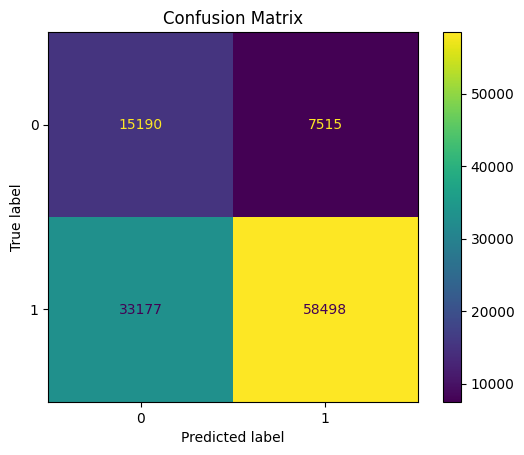

In [54]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()  

* True Negatives (TN): 15,190 - These are cases where the model correctly predicted the negative class.
* False Positives (FP): 7,515 - These are cases where the model incorrectly predicted the positive class.
* False Negatives (FN): 33,177 - These are cases where the model incorrectly predicted the negative class.
* True Positives (TP): 58,498 - These are cases where the model correctly predicted the positive class.


**ROC Curve**
* Shape: The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity).
* AUC Score: The area under the curve (AUC) is 0.65. This indicates that the model has a moderate ability to distinguish between the positive and negative classes. A perfect model would have an AUC of 1.0, while a model with no discriminatory power would have an AUC of 0.5.
* Conclusion: The model's performance is better than random guessing but still has room for improvement in correctly classifying the classes.

In [55]:
# Confusion matrix values
TN = 15190
FP = 7515
FN = 33177
TP = 58498

# Generate y_true and y_pred
y_true = np.array([0] * TN + [0] * FP + [1] * FN + [1] * TP)
y_pred = np.array([0] * TN + [1] * FP + [0] * FN + [1] * TP)

print("y_true:", y_true)
print("y_pred:", y_pred)


y_true: [0 0 0 ... 1 1 1]
y_pred: [0 0 0 ... 1 1 1]


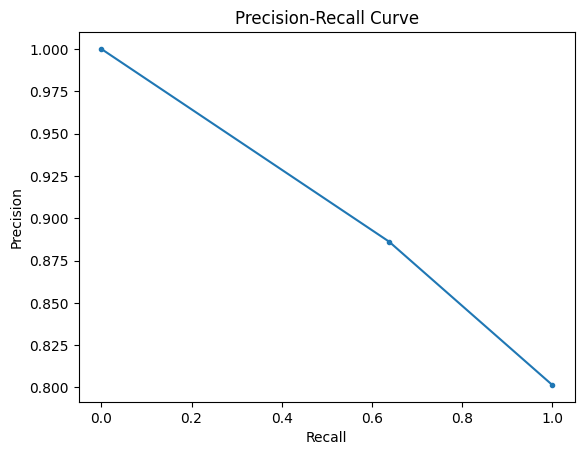

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score

y_pred_proba = np.array([0.9 if pred == 1 else 0.1 for pred in y_pred])  # Example probabilities
precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


**Precision-Recall Curve**
* Trend: The precision-recall curve shows a trade-off between precision and recall. Precision starts at 1.0 and decreases as recall increases.
* Interpretation: Initially, the model is very precise when recall is low, meaning it is very accurate when predicting positives, but it doesn't catch many true positives. As recall increases (catching more true positives), precision decreases, indicating more false positives.
* Conclusion: The model maintains high precision but struggles to balance both precision and recall simultaneously. This is typical in imbalanced datasets where one class dominates.

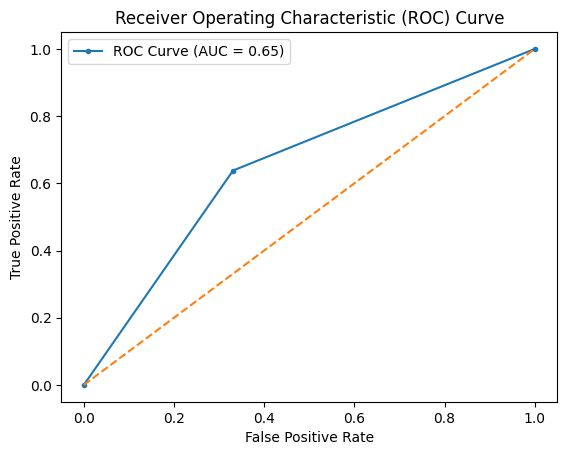

In [57]:
# ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)
plt.plot(fpr, tpr, marker='.', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**ROC Curve**
* Shape: The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity).
* AUC Score: The area under the curve (AUC) is 0.65. This indicates that the model has a moderate ability to distinguish between the positive and negative classes. A perfect model would have an AUC of 1.0, while a model with no discriminatory power would have an AUC of 0.5.
* Conclusion: The model's performance is better than random guessing but still has room for improvement in correctly classifying the classes.

In [58]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.31      0.67      0.43     22705
           1       0.89      0.64      0.74     91675

    accuracy                           0.64    114380
   macro avg       0.60      0.65      0.58    114380
weighted avg       0.77      0.64      0.68    114380



## Insights and Recommendations
1.  Loan Term and Default Rates

* Insight: Loans with a 36-month term are more common and have a higher number of fully paid loans compared to 60-month term loans. The proportion of charged-off loans is higher for 60-month term loans.
* Recommendation: Consider offering incentives for shorter-term loans to reduce the risk of defaults.
2. Loan Grades and Default Probability

* Insight: Grades B, A, and C are the most common, with Grade B having the highest number of loans. The proportion of charged-off loans increases as the loan grade decreases from A to G.
* Recommendation: Implement stricter underwriting criteria for lower-grade loans (E, F, G) to mitigate risk.
3. Home Ownership Status and Loan Repayment

* Insight: Most borrowers are either renting or have a mortgage, with renters forming the largest group. Borrowers with a mortgage have a higher number of fully paid loans and a lower proportion of charged-off loans compared to renters.
* Recommendation: Prioritize borrowers with a mortgage for loan approvals, as they have a better repayment track record.
4. Income Verification and Default Rates

* Insight: Loans with verified income have a slightly lower proportion of charged-off loans compared to those without verified income.
* Recommendation: Emphasize the importance of income verification in the loan approval process to reduce default rates.
5. Purpose of Loan and Default Risk

* Insight: Debt consolidation is the most common purpose, followed by credit card and home improvement. Small business, renewable energy, and educational loans have a higher proportion of charged-off loans.
* Recommendation: Evaluate the risk profiles of loans for small business, renewable energy, and education more rigorously to minimize defaults.
6. Application Type and Loan Outcomes

* Insight: Individual applications are more common than joint applications. Individual applications have higher numbers of both fully paid and charged-off loans, whereas joint applications show a lower proportion of charged-off loans.
* Recommendation: Encourage joint applications as they have a lower risk of default.
7. Feature Impact on Loan Status

* Insight: Higher interest rates are associated with a higher likelihood of loans being charged off. Loan amount, installment, annual income, debt-to-income ratio, revolving balance, and revolving utilization rate show similar distributions for fully paid and charged-off loans.
* Recommendation: Use interest rate as a significant predictor in loan approval models, and consider additional feature engineering to better differentiate between fully paid and charged-off loans.
8. Model Performance and Class Imbalance

* Insight: The logistic regression model has an accuracy of 64%, precision of 0.89, recall of 0.64, and an F1 score of 0.74. The ROC AUC score is 0.65, indicating moderate discrimination capability.
* Recommendation: Address class imbalance by resampling techniques or using alternative algorithms like random forests. Focus on improving recall for the positive class and refining the model through hyperparameter tuning and additional feature engineering. Use metrics like F1 score, precision-recall curves, and ROC AUC for evaluation instead of relying solely on accuracy.


Questionnaire:

1. What percentage of customers have fully paid their Loan Amount?
Ans: Approximately 80.41% of customers have fully paid their loan amount.

2. Comment about the correlation between Loan Amount and Installment features.
Ans: There is a strong positive correlation between loan amount and installment. This indicates that larger loan amounts are associated with higher installment payments, which is consistent with financial expectations.

3. The majority of people have home ownership as _______.
Ans: MORTGAGE have the majority home ownership.
		home_ownership
		MORTGAGE    198022
		RENT        159395
		OWN          37660
		OTHER          110
		NONE            29
		ANY              3
		
4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
Ans: True.

5. Name the top 2 afforded job titles.
Ans: 
Top 2 job titles with the highest loan repayment rates:
emp_title
Teacher    3532
Manager    3321

6. Thinking from a bank's perspective, which metric should our primary focus be on..
	1. ROC AUC
	2. Precision
	3. Recall
	4. F1 Score

Ans: Precision measures the proportion of true positive predictions among all positive predictions made by the model. High precision is important when the cost of false positives is high. In other words, you want to ensure that when the model predicts a loan will be fully paid, it is usually correct. Focus on precision if false positives (e.g., giving a loan to someone who will default) are particularly costly for the bank.

7. How does the gap in precision and recall affect the bank?
Ans: Precision identifies accurate default predictions, minimizing losses. Recall captures most defaults, reducing risk. Balancing both optimizes profitability and maintains customer trust in loan management.

8. Which were the features that heavily affected the outcome?
Ans: mort_acc

9. Will the results be affected by geographical location? (Yes/No)
Ans: No, the results of feature importance analysis in a logistic regression model are not affected by geographical location.